In [81]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [82]:
sx = 100

In [83]:
class point:
    
    def __init__(self, x , y):
        self.x = x
        self.y = y
        self.h = fitness_value(x, y)
        self.xbin = to_binary(x)
        self.ybin = to_binary(y)
        self.x_dec_place = to_binary_NoneSigin(x)
        self.y_dec_place = to_binary_NoneSigin(y)
        
    

In [84]:
def print_population(populations):
    population = []
    population = populations
    for i in range(len(population)):
        print(i+1,":\n")
        
        print("x: ",population[i].x)
        print("y: ",population[i].y)
        print("h: ",population[i].h,end='\n\n')
        
#         print("x_binary: ",population[i].xbin,"\n")
#         print("y_binary: ",population[i].ybin,"\n")
#         print(population[i].y_dec_place)
        

In [85]:
def fitness_value(x, y):

    value = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20
    
    return value

In [86]:
def to_binary(num):
    x = num
    if x < 0 :
        x = x * -1
        
    x_bin = "{0:b}".format(int(x))
    x_str = ['0','0','0','0','0']
    
    j = 0
    for i in range(len(x_str) - len(x_bin) , 5):
        x_str[i] = x_bin[j]
        j +=1
        
    if num >= 0 :
        x_str.insert(0,'0')
    else :
        x_str.insert(0,'1')
        
    return x_str

In [87]:

def to_binary_NoneSigin(x): 
    
    x = round(x,4)
    x2 = str(x)    

    temp = ''
    for i in range(len(x2)):
        if x2[i] == '.':
            index = i
            break

    for i in range(index + 1 , len(x2)): 
        temp = temp + x2[i]
        
    while len(temp) < 4:
        temp = '0' + str(temp)
    
    x_bin = "{0:b}".format(int(temp))
    
    x_str = ['0','0','0','0','0','0','0','0','0','0','0','0','0','0']
    
    j = 0
    for i in range(len(x_str) - len(x_bin) , 14):
        x_str[i] = x_bin[j]
        j +=1
        
    return x_str
    
    
    

In [88]:
def to_decimal(xbin, x_dec_place) :
    
    x = to_decimal_z(xbin)
    x += to_decimal_place(x_dec_place)

    if xbin[0] == '1':
        x *= -1
        
    return x

In [89]:
def to_decimal_z(xbin) :
    
    x=''
    for i in range(1,len(xbin)):
        x = x[:len(xbin)] + xbin[i] + x[len(xbin):]
     
    x = int(x, 2)
    
    return x

In [90]:
def to_decimal_place(x_dec_place) :

    x=''
    for i in range(0,len(x_dec_place)):
        x = x[:len(x_dec_place)] + x_dec_place[i] + x[len(x_dec_place):]
    
    x = int(x, 2)

    return x * (10 ** -4)

In [91]:
def first_population(size):
    popu = []
    for i in range(size):
        x = random.uniform(-30 , 30)
        y = random.uniform(-30 , 30)
        popu.append(point(x,y))
    
    return popu

In [92]:
def select_parents(population,size):
    
    All_Parent = []
    sort_population = []
    weights = []
    sort_population = sorted(population, key=lambda p: p.h, reverse=True)
    
    for i in range(len(sort_population)):
        weights.append(i+1)
    
    All_Parent = random.choices(sort_population, weights = weights , k = size)
        
    return All_Parent

In [93]:
def select_parents_computation(population,size):
    
    All_Parent = []
    sort_population = []
    
    
    for i in range(0,size) :
        temp_population = population.copy()
        random_population = []
        for j in range(0,len(population)//5) :
            index = random.randint(0,len(population)-1-j)
            random_population.append(temp_population[index])
            temp_population.pop(index)
            
        sort_population = sorted(random_population, key=lambda p: p.h, reverse=False)
        All_Parent.append(sort_population[0])
    
        
    return All_Parent

In [94]:
def cross_one_point_z(parent1, parent2) :
    index = random.choice([1,2,3,4,5])
    child = []

    for i in range(0,len(parent1)) :
        if i < index :
            child.append(parent1[i])
        else :
            child.append(parent2[i])
    
    return child

In [95]:
def cross_one_point_palce(parent1, parent2) :            
    index = random.choice([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    child = []

    for i in range(0,len(parent1)) :
        if i < index :
            child.append(parent1[i])
        else :
            child.append(parent2[i])

    return child

In [96]:
def cross_uniform_z(parent1, parent2) :
    child = []

    for i in range(0,len(parent1)) :
        if random.choice(['1', '2']) == '1' :
            child.append(parent1[i])
        else :
            child.append(parent2[i])
    
    return child

In [97]:
def cross_uniform_palce(parent1, parent2) :
    child = []

    for i in range(0,len(parent1)) :
        if random.choice(['1', '2']) == '1' :
            child.append(parent1[i])
        else :
            child.append(parent2[i])
    
    return child

In [115]:
def cross_over(parents) : 
    childeren = []
    for i in range(0,len(parents)-1) :

        xbin_child1 = cross_one_point_z(parents[i].xbin,parents[i+1].xbin)
#        xbin_child1 = cross_uniform_z(parents[i].xbin,parents[i+1].xbin)
        xbin_child2 = xbin_child1[::-1]
        ybin_child1 = cross_one_point_z(parents[i].ybin,parents[i+1].ybin)
#        ybin_child1 = cross_uniform_z(parents[i].ybin,parents[i+1].ybin)
        ybin_child2 = ybin_child1[::-1]
        
        x_dec_place_child1 = cross_one_point_palce(parents[i].x_dec_place,parents[i+1].x_dec_place)
#        x_dec_place_child1 = cross_uniform_palce(parents[i].x_dec_place,parents[i+1].x_dec_place)
        x_dec_place_child2 = x_dec_place_child1[::-1]
        y_dec_place_child1 = cross_one_point_palce(parents[i].y_dec_place,parents[i+1].y_dec_place)
#        y_dec_place_child1 = cross_uniform_palce(parents[i].y_dec_place,parents[i+1].y_dec_place)
        y_dec_place_child2 = y_dec_place_child1[::-1]
        
        x_child1 = to_decimal(xbin_child1,x_dec_place_child1)
        y_child1 = to_decimal(ybin_child1,y_dec_place_child1)
        x_child2 = to_decimal(xbin_child2,x_dec_place_child2)
        y_child2 = to_decimal(ybin_child2,y_dec_place_child2)
        
        childeren.append(point(x_child1,y_child1))
        childeren.append(point(x_child2,y_child2))
        
        i += 1
        
        
    return childeren

In [116]:
def mutate(childeren):
    mutatant = childeren
    
    for i in range(0,len(mutatant)) :
        index = random.randint(0,len(mutatant[i].xbin)-1)
        if random.choice(['0', '1']) == '1' :
            if random.random() < 0.2:
                mutatant[i].xbin[index] = random.choice(['0', '1'])
        else :
            if random.random() < 0.2:
                mutatant[i].ybin[index] = random.choice(['0', '1'])
    
    
    for i in range(0,len(mutatant)) :
        index = random.randint(0,len(mutatant[i].x_dec_place)-1)
        if random.choice(['0', '1']) == '1' :
            if random.random() < 0.2:
                mutatant[i].x_dec_place[index] = random.choice(['0', '1'])
        else :
            if random.random() < 0.2:
                mutatant[i].y_dec_place[index] = random.choice(['0', '1'])
        
    return mutatant

In [117]:
def replacement(population, parents, childeren) :
    population_copy = population.copy()
    parents_copy = parents.copy()
    childeren_copy = childeren.copy()
    
    newlistChild = []
    newlistParent = []
    newlistChild = sorted(childeren_copy, key=lambda ch: ch.h, reverse=False)      #STEP 6
    newlistParent = sorted(parents_copy, key=lambda p: p.h, reverse=True)

    for i in range(0,int((len(parents_copy)*30/100)+0.5)) :
        newlistParent[i] = newlistChild[i]
    
    newpopulation = newlistParent
    sort_pop = sorted(population_copy, key=lambda p: p.h, reverse=True)
    
    for i in range(0,len(newpopulation)) :
        sort_pop[i] = newpopulation[i]
        
    return sort_pop

In [118]:
def GetBest(population) :
    pop = sorted(population, key=lambda ch: ch.h, reverse=False)
    print("x of best point in population: ",pop[0].x)
    print("y of best point in population: ",pop[0].y)
    print("fitness of best point in population: ",pop[0].h,end='\n\n')
    return pop[0].h

In [119]:
def main():
    draw_fitness = []    #for draw result
    cnt=0                # for count number of repeat best in generations
    Best=100             # maximum of ackley
    gen=0                # for count number of generations
    target=0             # minimum of ackley
    
    firstpopulation = first_population(sx)   #STEP 1
    current_population = firstpopulation    #STEP 2
    
    while True :
        if gen > 1000 :
            break
            
        if cnt == 800 :
            break
        
        parents = select_parents(current_population,sx//2)   #STEP 3
#        parents = select_parents_computation(current_population,sx//2)   #STEP 3
#        print_population(current_population)

        childeren = cross_over(parents)      #STEP 4

        childeren = mutate(childeren)        #STEP 5
        
        next_population = replacement(current_population, parents, childeren)  #STEP 6        

        BestNew = GetBest(current_population)      #STEP 7
        
        if Best == BestNew :
            cnt += 1
        elif Best > BestNew :
            cnt=0
            Best = BestNew
        else :
            cnt = 0
        
        print('gen :', gen)
        print("Best (in gen ",gen,") :",Best)
        print("********************")
        draw_fitness.append(Best)
        if Best == target :
            break
            
        current_population = next_population
        gen += 1
    hist = draw_fitness
    plt.plot(hist)

x of best point in population:  -2.5717400421674377
y of best point in population:  -0.9018575190977458
fitness of best point in population:  8.156172947312538

gen : 0
Best (in gen  0 ) : 8.156172947312538
********************
x of best point in population:  1.2983
y of best point in population:  0.0206
fitness of best point in population:  4.659451897864983

gen : 1
Best (in gen  1 ) : 4.659451897864983
********************
x of best point in population:  -0.1621
y of best point in population:  0.5133
fitness of best point in population:  3.394448924110929

gen : 2
Best (in gen  2 ) : 3.394448924110929
********************
x of best point in population:  -0.1633
y of best point in population:  -0.0074
fitness of best point in population:  1.040129478579047

gen : 3
Best (in gen  3 ) : 1.040129478579047
********************
x of best point in population:  -0.0665
y of best point in population:  0.0067
fitness of best point in population:  0.3037518176851819

gen : 4
Best (in gen  4 ) 

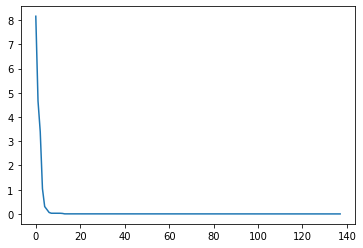

In [122]:
main()